# Imports

In [36]:
import pandas as pd # For the DataFrame Object
import numpy as np # For numerical computations
import scipy.stats as st # For statistical tests
import matplotlib.pyplot as plt # For visualizations
import seaborn as sns # For easier visualizations

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Inspection

In [38]:
dataset = pd.read_csv('earthquake.csv')

In [39]:
dataset.shape

(4730, 22)

In [40]:
dataset.nunique()

time               4730
latitude           4608
longitude          4473
depth              2820
mag                  35
magType               3
nst                 198
gap                 201
dmin               3093
rms                 121
net                   1
id                 4730
updated            3007
place              3790
type                  1
horizontalError     984
depthError         1782
magError            221
magNst              229
status                1
locationSource        1
magSource             1
dtype: int64

In [41]:
dataset.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                2190
gap                   0
dmin                  0
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError       0
depthError            0
magError              0
magNst                0
status                0
locationSource        0
magSource             0
dtype: int64

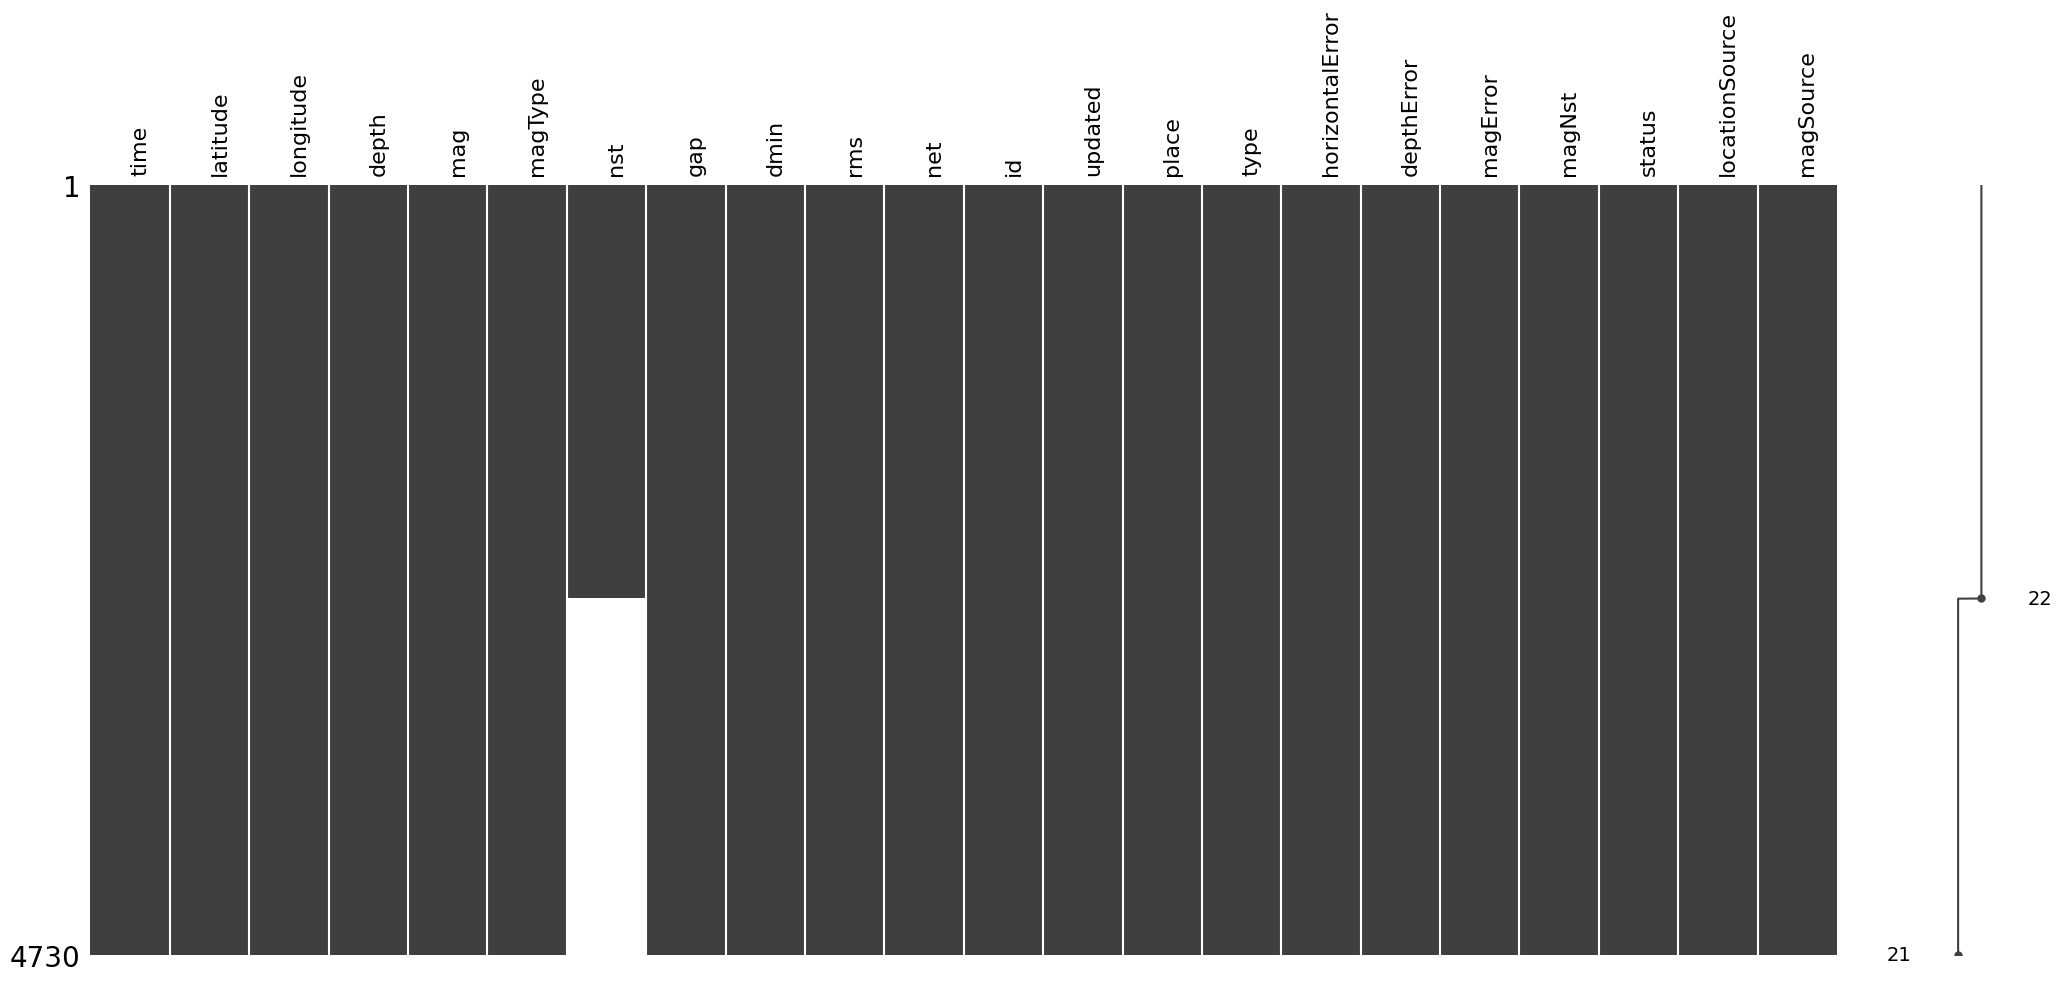

In [42]:
import missingno as mno
mno.matrix(dataset)
plt.xticks(ticks=range(len(dataset.columns)), labels=dataset.columns, rotation=90)
plt.show()

In [43]:
dataset.describe(include='all')

time     latitude    longitude        depth  \
count                       4730  4730.000000  4730.000000  4730.000000   
unique                      4730          NaN          NaN          NaN   
top     2019-03-22T16:09:23.075Z          NaN          NaN          NaN   
freq                           1          NaN          NaN          NaN   
mean                         NaN    10.157963   124.796583    57.651294   
std                          NaN     4.379516     2.545689    80.257311   
min                          NaN     4.705700   115.577600     2.670000   
25%                          NaN     6.715075   122.562325    10.000000   
50%                          NaN     8.735550   126.045050    35.725500   
75%                          NaN    13.058900   126.702700    71.262500   
max                          NaN    22.070500   128.058100   667.390000   

                mag magType          nst          gap         dmin  \
count   4730.000000    4730  2540.000000  4730.000000  4730.000000   
unique          NaN       3          NaN          NaN          NaN   
top             NaN      mb          NaN          NaN          NaN   
freq            NaN    4353          NaN          NaN          NaN   
mean       4.567590     NaN    53.780709   107.132981     3.622542   
std        0.368167     NaN    41.007443    32.247429     3.990297   
min        3.800000     NaN     9.000000    11.000000     0.071000   
25%        4.300000     NaN    26.000000    88.000000     1.654000   
50%        4.500000     NaN    41.000000   112.000000     2.148500   
75%        4.700000     NaN    68.250000   127.000000     4.001500   
max        7.600000     NaN   401.000000   286.000000    45.477000   

                rms   net          id                   updated  \
count   4730.000000  4730        4730                      4730   
unique          NaN     1        4730                      3007   
top             NaN    us  us2000k75a  2024-02-06T21:54:01.040Z   
freq            NaN  4730           1                        55   
mean       0.703049   NaN         NaN                       NaN   
std        0.222407   NaN         NaN                       NaN   
min        0.130000   NaN         NaN                       NaN   
25%        0.540000   NaN         NaN                       NaN   
50%        0.680000   NaN         NaN                       NaN   
75%        0.840000   NaN         NaN                       NaN   
max        1.450000   NaN         NaN                       NaN   

                        place        type  horizontalError   depthError  \
count                    4730        4730      4730.000000  4730.000000   
unique                   3790           1              NaN          NaN   
top     Mindanao, Philippines  earthquake              NaN          NaN   
freq                       63        4730              NaN          NaN   
mean                      NaN         NaN         9.298116     4.802241   
std                       NaN         NaN         2.662239     2.899338   
min                       NaN         NaN         1.900000     0.324000   
25%                       NaN         NaN         7.500000     1.900000   
50%                       NaN         NaN         9.200000     4.745000   
75%                       NaN         NaN        11.017500     7.335500   
max                       NaN         NaN        19.710000    16.000000   

           magError       magNst    status locationSource magSource  
count   4730.000000  4730.000000      4730           4730      4730  
unique          NaN          NaN         1              1         1  
top             NaN          NaN  reviewed             us        us  
freq            NaN          NaN      4730           4730      4730  
mean       0.109156    39.193658       NaN            NaN       NaN  
std        0.044483    39.822583       NaN            NaN       NaN  
min        0.027000     1.000000       NaN            NaN       NaN  
25%        0.073000 

# Data Preprocessing

In [44]:
# Due to the missing values in the nst column, we will be dropping this for the spatial prediction of earthquakes
# also drop id cuz unique ids lol
dataset.drop(columns=["nst", "id"], inplace=True)

In [45]:
print(dataset.duplicated().sum())

0


In [46]:
for col in dataset.select_dtypes(include='object'):
    unique_types = dataset[col].apply(type).unique()
    if len(unique_types) > 1:
        print(f"Column '{col}' has mixed data types: {unique_types}")

In [47]:
cat_cols = dataset.select_dtypes(include=['category', 'object']).columns
unique_values = {}

for col in cat_cols:
    unique_values[col] = dataset[col].unique().tolist()

for col in cat_cols:
    print(f'{col}: {unique_values[col]}')

time: ['2025-03-17T23:04:35.667Z', '2025-03-17T15:41:51.906Z', '2025-03-16T01:10:29.586Z', '2025-03-13T21:51:20.435Z', '2025-03-13T20:25:47.394Z', '2025-03-12T15:09:44.222Z', '2025-03-09T15:24:29.738Z', '2025-03-09T09:46:45.286Z', '2025-03-09T07:04:12.993Z', '2025-03-09T06:44:02.449Z', '2025-03-09T01:07:17.330Z', '2025-03-08T14:07:32.391Z', '2025-03-08T09:13:26.721Z', '2025-03-08T08:03:23.657Z', '2025-03-08T02:54:35.279Z', '2025-03-07T16:53:59.826Z', '2025-03-06T13:40:24.894Z', '2025-03-04T01:42:22.891Z', '2025-03-02T21:11:46.579Z', '2025-03-01T13:59:53.979Z', '2025-03-01T06:47:43.954Z', '2025-03-01T06:36:40.192Z', '2025-02-28T21:00:29.234Z', '2025-02-28T03:55:30.104Z', '2025-02-28T03:27:09.410Z', '2025-02-26T17:41:41.388Z', '2025-02-25T16:29:02.548Z', '2025-02-24T17:05:49.445Z', '2025-02-22T18:30:58.566Z', '2025-02-21T05:33:44.196Z', '2025-02-19T12:15:14.957Z', '2025-02-18T14:26:55.191Z', '2025-02-17T10:28:15.312Z', '2025-02-17T04:19:29.548Z', '2025-02-16T11:43:58.523Z', '2025-02-15T2

In [48]:
# Drop columns that would most likely have no impact on spatial prediction
dataset.drop(columns=["status", "updated", "magNst", "magSource", "locationSource"], inplace=True)

In [49]:
# Convert the time column (being read as string) to time-based features
dataset["time"] = pd.to_datetime(dataset["time"])

dataset["year"] = dataset["time"].dt.year
dataset["month"] = dataset["time"].dt.month
dataset["day"] = dataset["time"].dt.day
dataset["hour"] = dataset["time"].dt.hour
dataset["minute"] = dataset["time"].dt.minute
dataset["second"] = dataset["time"].dt.second

In [50]:
# For place column

import re

def split_place(place):
    match = re.match(r"(\d+ km \w+) of (.+)", place)
    if match:
        regionDistance = match.group(1) 
        geographicRegion = match.group(2)
    else:
        regionDistance = None
        geographicRegion = place 

    return pd.Series([regionDistance, geographicRegion])

dataset[["regionDistance", "geographicRegion"]] = dataset["place"].apply(split_place)

dataset.drop(columns=["place"], inplace=True)

dataset.head()

time  latitude  longitude    depth  mag magType  \
0 2025-03-17 23:04:35.667000+00:00    5.6148   126.0966  130.501  4.5      mb   
1 2025-03-17 15:41:51.906000+00:00    8.0813   126.7544   35.000  5.2      mb   
2 2025-03-16 01:10:29.586000+00:00   10.1640   125.8133   72.233  4.8      mb   
3 2025-03-13 21:51:20.435000+00:00   17.7988   120.4498   67.921  4.4      mb   
4 2025-03-13 20:25:47.394000+00:00   17.6112   120.7160   10.000  4.6      mb   

   gap   dmin   rms net        type  horizontalError  depthError  magError  \
0  108  1.071  0.49  us  earthquake             8.22       5.972     0.089   
1   78  1.539  1.18  us  earthquake             9.20       1.873     0.042   
2   88  3.083  0.86  us  earthquake            10.71       5.177     0.051   
3  241  5.028  0.67  us  earthquake            14.95      11.548     0.095   
4  110  5.191  0.89  us  earthquake            11.12       1.919     0.067   

   year  month  day  hour  minute  second regionDistance  \
0  2025      3   17    23       4      35      60 km ESE   
1  2025      3   17    15      41      51      35 km ENE   
2  2025      3   16     1      10      29      29 km WNW   
3  2025      3   13    21      51      20        1 km NW   
4  2025      3   13    20      25      47         4 km S   

            geographicRegion  
0       Caburan, Philippines  
1   Santa Maria, Philippines  
2  Santa Monica, Philippines  
3       Cabugao, Philippines  
4       Dolores, Philippines

# EDA

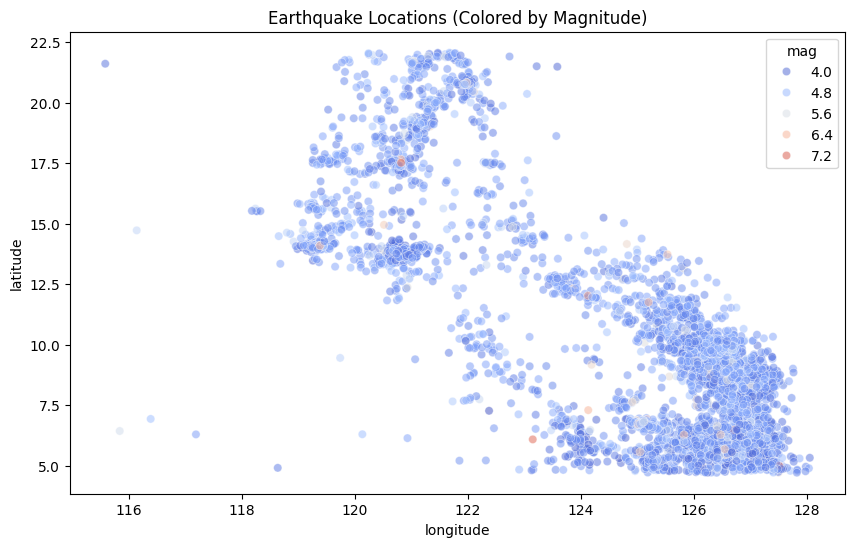

In [51]:
# Check latitude and longitude
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x="longitude", y="latitude", hue="mag", alpha=0.5, palette="coolwarm")
plt.title("Earthquake Locations (Colored by Magnitude)")
plt.show()

<Axes: >

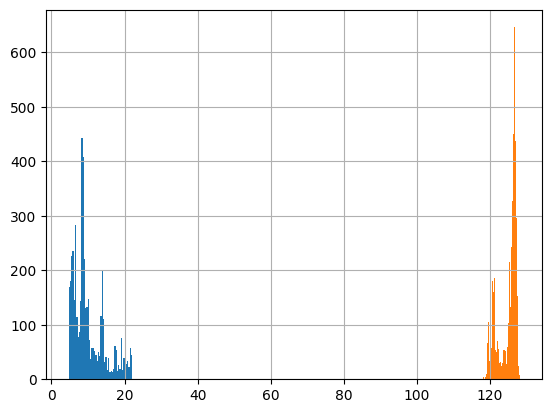

In [52]:
dataset["latitude"].hist(bins=50)
dataset["longitude"].hist(bins=50)

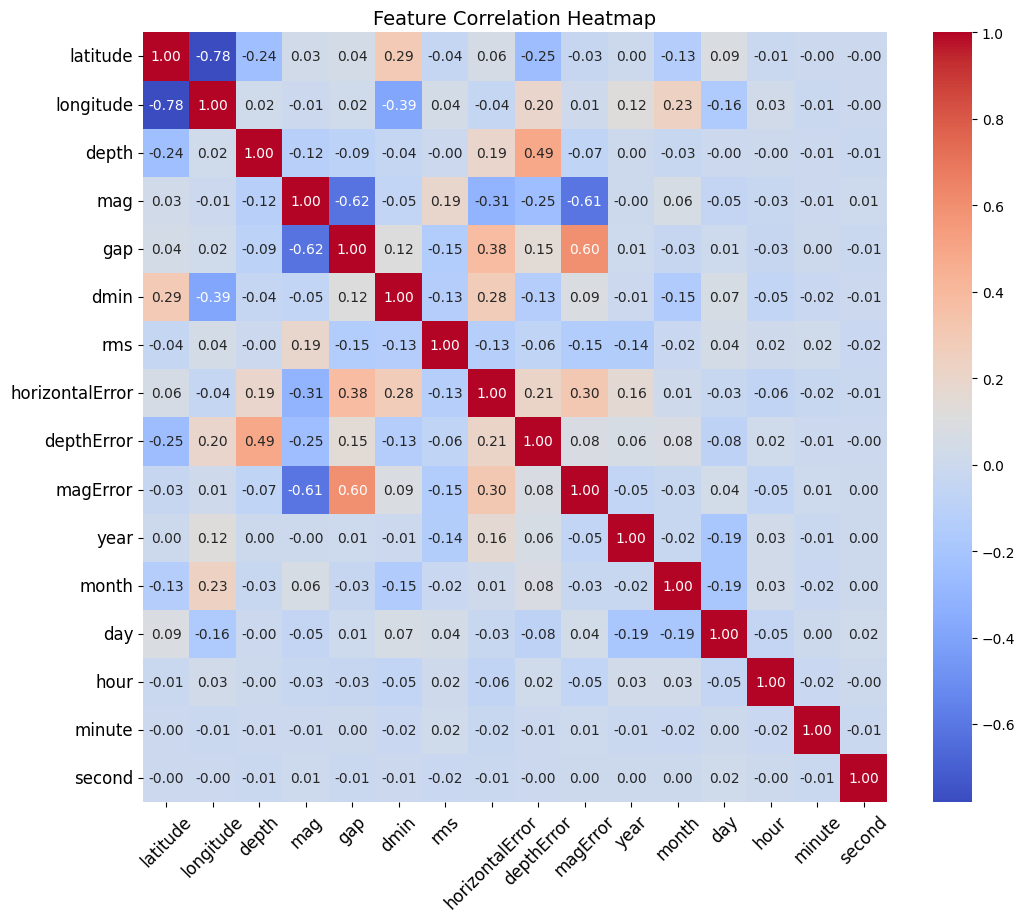

In [53]:
numeric_cols = dataset.select_dtypes(include=["number"]).columns
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.show()

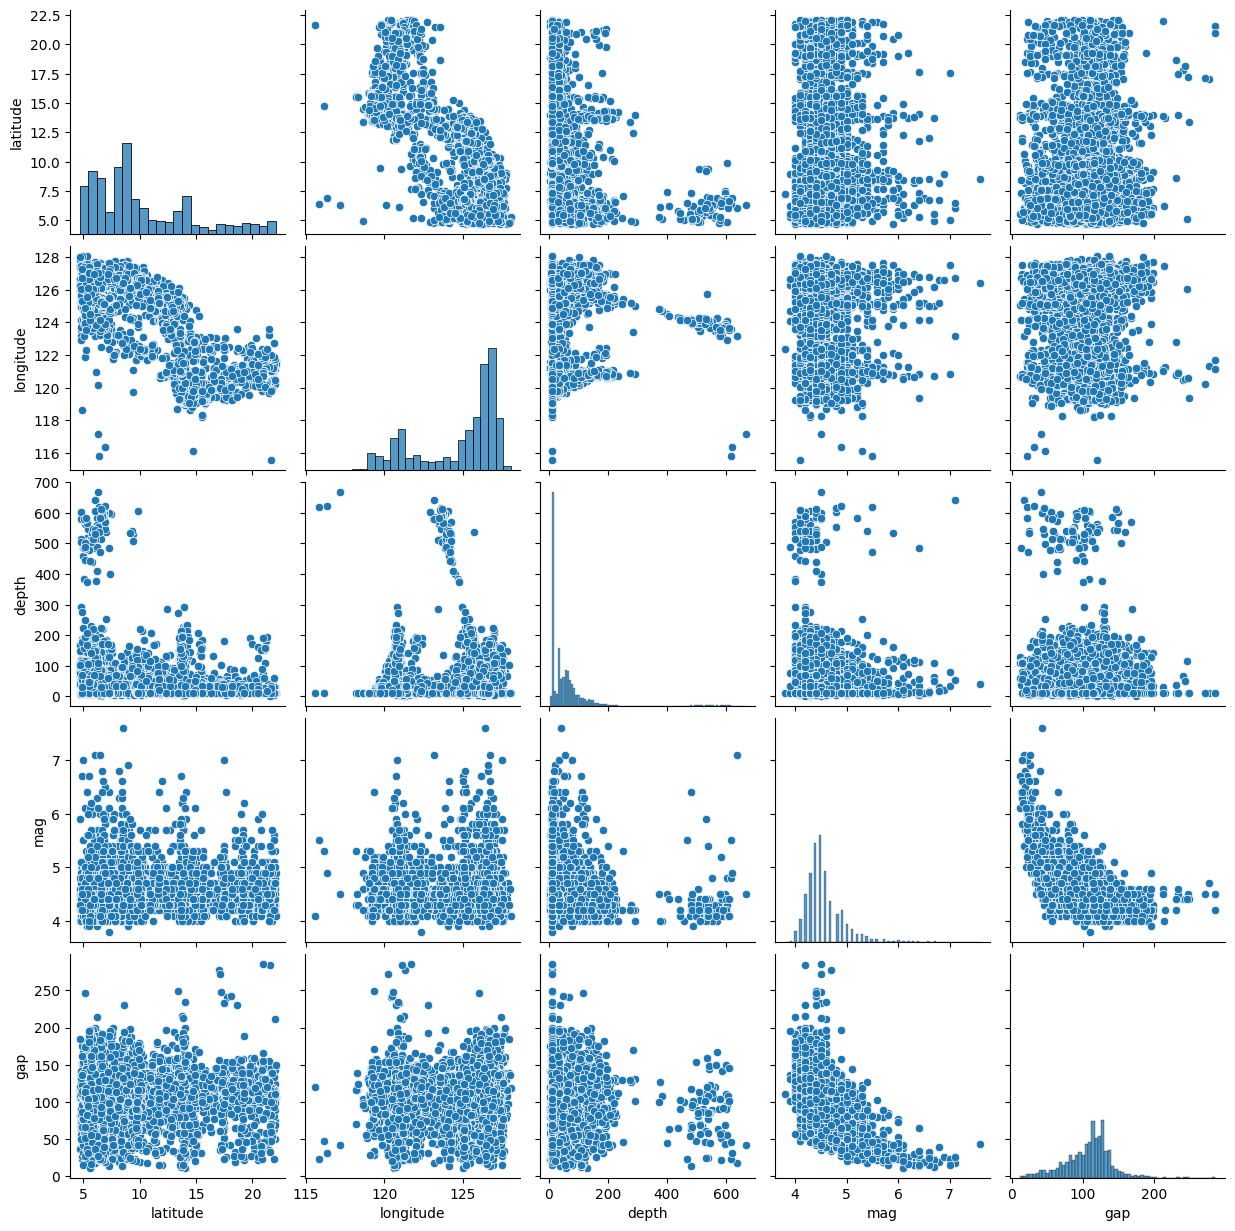

In [54]:
sns.pairplot(dataset[["latitude", "longitude", "depth", "mag", "gap"]])
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

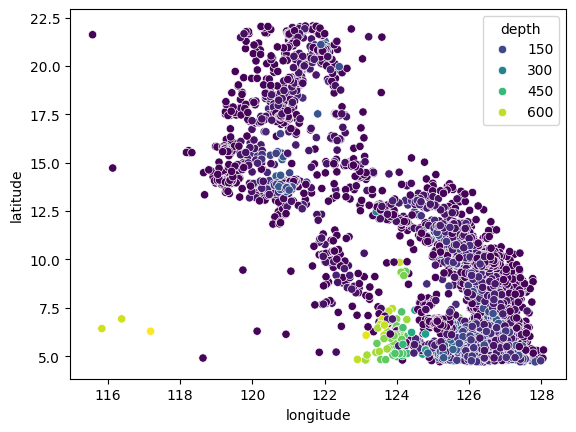

In [55]:
sns.scatterplot(data=dataset, x="longitude", y="latitude", hue="depth", palette="viridis")

Text(0.5, 1.0, 'Earthquakes Per Month')

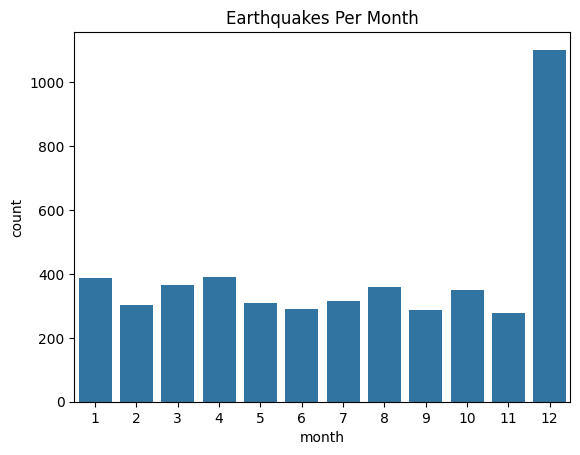

In [56]:
dataset["time"] = pd.to_datetime(dataset["time"])
dataset["year"] = dataset["time"].dt.year
dataset["month"] = dataset["time"].dt.month

sns.countplot(data=dataset, x="month")
plt.title("Earthquakes Per Month")

<Axes: title={'center': 'Earthquake Frequency Over Time'}, xlabel='year'>

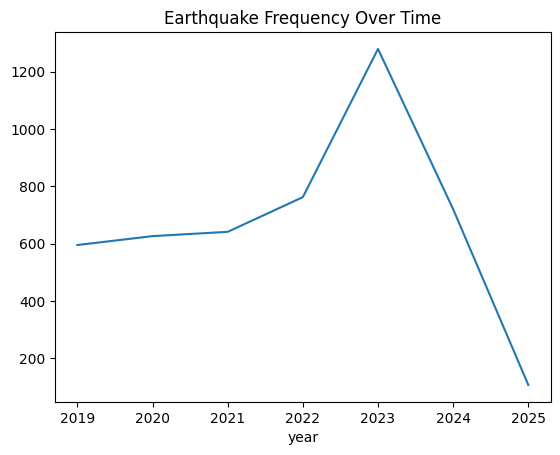

In [57]:
dataset.groupby("year").size().plot(kind="line", title="Earthquake Frequency Over Time")

<Axes: xlabel='depth'>

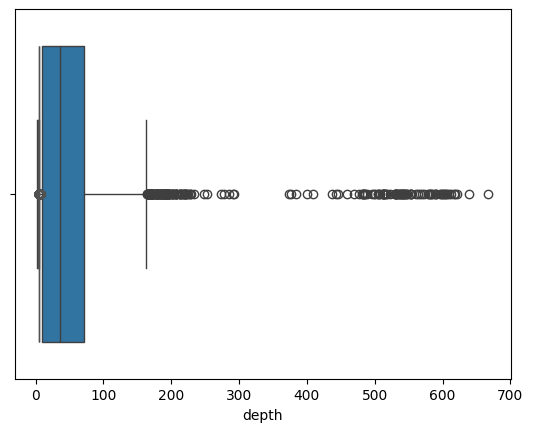

In [58]:
sns.boxplot(data=dataset, x="depth")
sns.boxplot(data=dataset, x="mag")


<Axes: xlabel='longitude', ylabel='latitude'>

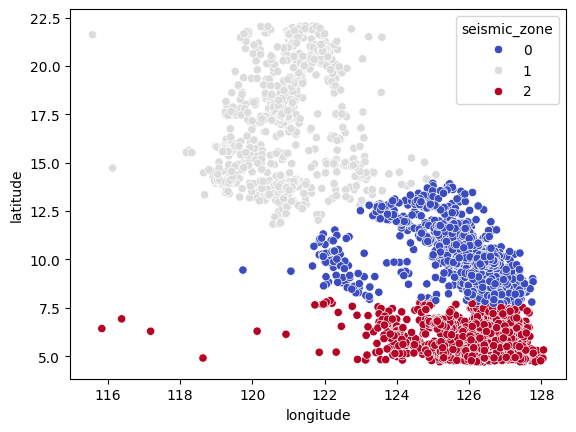

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
dataset["seismic_zone"] = kmeans.fit_predict(dataset[["latitude", "longitude"]])

sns.scatterplot(data=dataset, x="longitude", y="latitude", hue="seismic_zone", palette="coolwarm")

C:\Users\NEO\AppData\Local\Temp\ipykernel_14920\2804773127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset["seismic_zone"], palette="coolwarm")


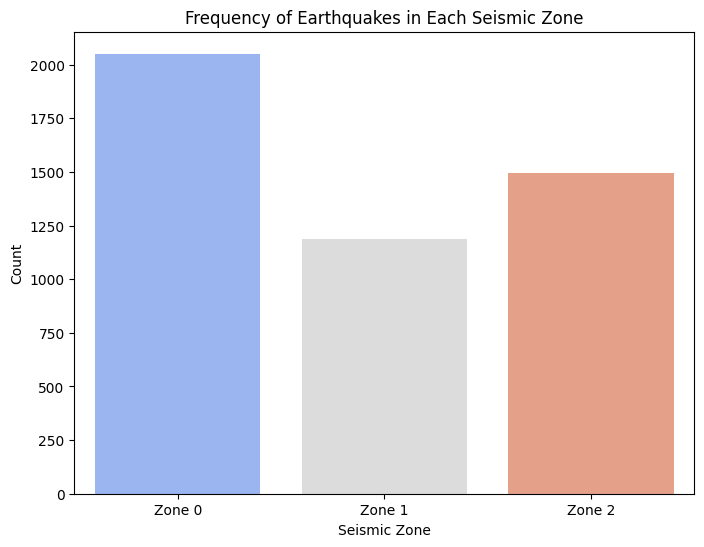

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=dataset["seismic_zone"], palette="coolwarm")
plt.title("Frequency of Earthquakes in Each Seismic Zone")
plt.xlabel("Seismic Zone")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Zone 0", "Zone 1", "Zone 2"])
plt.show()

In [61]:
zone_locations = dataset.groupby("seismic_zone")["geographicRegion"].unique()

for zone, locations in zone_locations.items():
    print(f"Seismic Zone {zone}:")
    print(", ".join(locations[:10]))
    print("-" * 50)

Seismic Zone 0:
Santa Maria, Philippines, Santa Monica, Philippines, Barcelona, Philippines, Gamut, Philippines, Aras-asan, Philippines, Taytayan, Philippines, Cabangahan, Philippines, Kinablangan, Philippines, Guiuan, Philippines, Loreto, Philippines
--------------------------------------------------
Seismic Zone 1:
Cabugao, Philippines, Dolores, Philippines, Suso, Philippines, Lungog, Philippines, Calatagan, Philippines, Namuac, Philippines, Macabuboni, Philippines, Basco, Philippines, Hengchun, Taiwan, Casuguran, Philippines
--------------------------------------------------
Seismic Zone 2:
Caburan, Philippines, Pondaguitan, Philippines, Liliongan, Philippines, Santiago, Philippines, Banisilan, Philippines, Osias, Philippines, Magsaysay, Philippines, San Ignacio, Philippines, Maitum, Philippines, Baculin, Philippines
--------------------------------------------------


In [62]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt

map_center = [12.8797, 121.7740] 

# Create a Folium map
m = folium.Map(location=map_center, zoom_start=5)

colors = {0: "blue", 1: "red", 2: "green"}
for _, row in dataset.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color=colors[row["seismic_zone"]],
        fill=True,
        fill_color=colors[row["seismic_zone"]],
        fill_opacity=0.6,
    ).add_to(m)

m.save("earthquake_clusters.html")
m

# Create datasets for each zone

In [63]:
for zone in dataset["seismic_zone"].unique():
    zone_df = dataset[dataset["seismic_zone"] == zone]
    filename = f"seismic_zone_{zone}.csv"
    zone_df.to_csv(filename, index=False)
    print(f"Saved {filename} with {len(zone_df)} rows.")

Saved seismic_zone_2.csv with 1493 rows.
Saved seismic_zone_0.csv with 2051 rows.
Saved seismic_zone_1.csv with 1186 rows.


In [64]:
# Create validation datasets
from sklearn.model_selection import train_test_split

for zone in dataset["seismic_zone"].unique():
    zone_df = dataset[dataset["seismic_zone"] == zone]

    train_df, val_df = train_test_split(zone_df, test_size=0.1, random_state=42)

    train_filename = f"seismic_zone_{zone}.csv"
    val_filename = f"seismic_zone_{zone}_val.csv"

    train_df.to_csv(train_filename, index=False)
    val_df.to_csv(val_filename, index=False)

    print(f"Saved {train_filename} with {len(train_df)} rows.")
    print(f"Saved {val_filename} with {len(val_df)} rows.")

Saved seismic_zone_2.csv with 1343 rows.
Saved seismic_zone_2_val.csv with 150 rows.
Saved seismic_zone_0.csv with 1845 rows.
Saved seismic_zone_0_val.csv with 206 rows.
Saved seismic_zone_1.csv with 1067 rows.
Saved seismic_zone_1_val.csv with 119 rows.


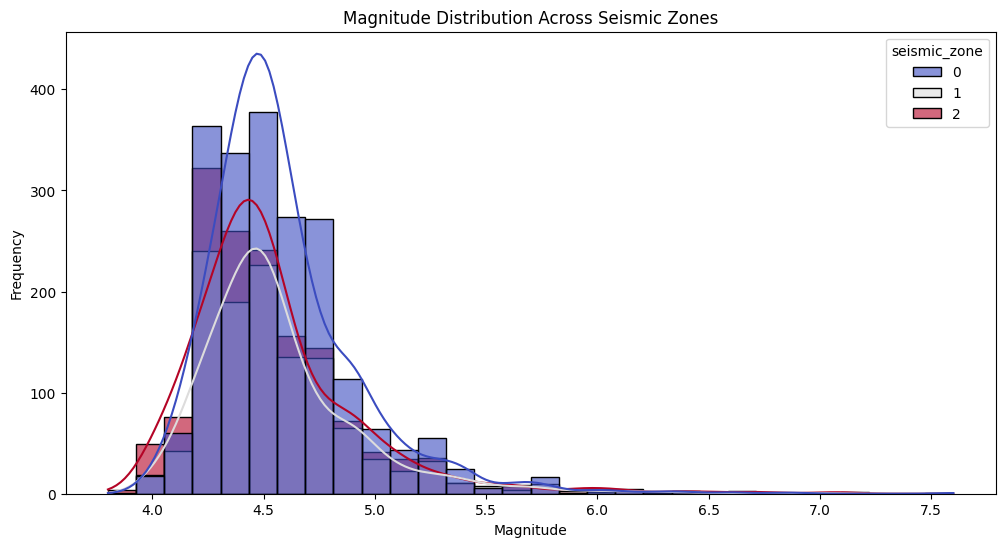

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(data=dataset, x="mag", hue="seismic_zone", bins=30, kde=True, palette="coolwarm", alpha=0.6)
plt.title("Magnitude Distribution Across Seismic Zones")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

C:\Users\NEO\AppData\Local\Temp\ipykernel_14920\1440450044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="seismic_zone", y="mag", palette="coolwarm")


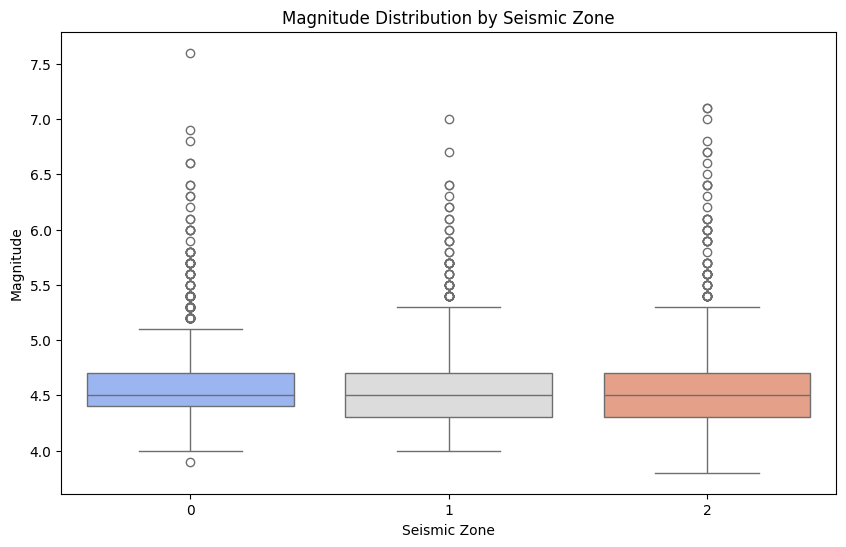

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset, x="seismic_zone", y="mag", palette="coolwarm")
plt.title("Magnitude Distribution by Seismic Zone")
plt.xlabel("Seismic Zone")
plt.ylabel("Magnitude")
plt.show()


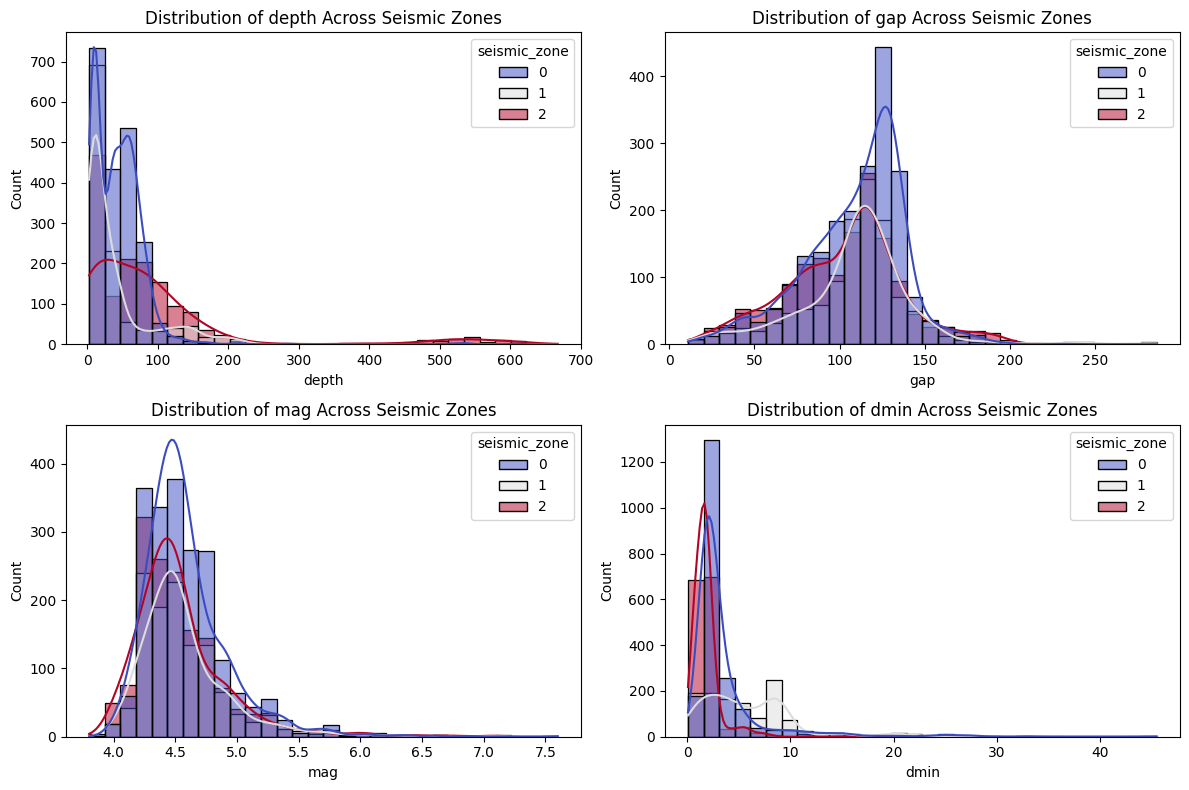

In [67]:
features_to_check = ["depth", "gap", "mag", "dmin"]

plt.figure(figsize=(12,8))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=dataset, x=feature, hue="seismic_zone", bins=30, kde=True, palette="coolwarm", alpha=0.5)
    plt.title(f"Distribution of {feature} Across Seismic Zones")
plt.tight_layout()
plt.show()


In [68]:
from scipy.stats import ks_2samp

features_to_check = ["depth", "gap", "mag", "dmin"]
zones = dataset["seismic_zone"].unique()

for feature in features_to_check:
    print(f"--- KS Test for {feature} ---")
    for i in range(len(zones)):
        for j in range(i+1, len(zones)):
            stat, p_value = ks_2samp(
                dataset[dataset["seismic_zone"] == zones[i]][feature].dropna(),
                dataset[dataset["seismic_zone"] == zones[j]][feature].dropna()
            )
            print(f"Zone {zones[i]} vs Zone {zones[j]}: KS Test p-value = {p_value:.4f}")


--- KS Test for depth ---
Zone 2 vs Zone 0: KS Test p-value = 0.0000
Zone 2 vs Zone 1: KS Test p-value = 0.0000
Zone 0 vs Zone 1: KS Test p-value = 0.0000
--- KS Test for gap ---
Zone 2 vs Zone 0: KS Test p-value = 0.0000
Zone 2 vs Zone 1: KS Test p-value = 0.0000
Zone 0 vs Zone 1: KS Test p-value = 0.0000
--- KS Test for mag ---
Zone 2 vs Zone 0: KS Test p-value = 0.0000
Zone 2 vs Zone 1: KS Test p-value = 0.0113
Zone 0 vs Zone 1: KS Test p-value = 0.1755
--- KS Test for dmin ---
Zone 2 vs Zone 0: KS Test p-value = 0.0000
Zone 2 vs Zone 1: KS Test p-value = 0.0000
Zone 0 vs Zone 1: KS Test p-value = 0.0000


# Training

In [ ]:
# Train main model (zone 0)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

zone_0 = pd.read_csv("seismic_zone_0.csv")

features = ["depth", "mag", "gap", "dmin", "rms"]
target = ["latitude", "longitude"]

def train_zone_0(df):
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    joblib.dump(model, "zone_0_model.pkl") 
    print("✅ Trained and saved model for Zone 0")

train_zone_0(zone_0)

✅ Trained and saved model for Zone 0


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

zone_0_val = pd.read_csv("seismic_zone_0_val.csv")

features = ["depth", "mag", "gap", "dmin", "rms"]
target = ["latitude", "longitude"]

model = joblib.load("zone_0_model.pkl")

X_test = zone_0_val[features]
y_test = zone_0_val[target]

y_pred = model.predict(X_test)

y_pred_df = pd.DataFrame(y_pred, columns=target)

mse_lat = mean_squared_error(y_test["latitude"], y_pred_df["latitude"])
mse_lon = mean_squared_error(y_test["longitude"], y_pred_df["longitude"])

mae_lat = mean_absolute_error(y_test["latitude"], y_pred_df["latitude"])
mae_lon = mean_absolute_error(y_test["longitude"], y_pred_df["longitude"])

r2_lat = r2_score(y_test["latitude"], y_pred_df["latitude"])
r2_lon = r2_score(y_test["longitude"], y_pred_df["longitude"])

print(f"📊 Model Evaluation for Zone 0:")
print(f"Mean Squared Error (Latitude): {mse_lat}")
print(f"Mean Squared Error (Longitude): {mse_lon}")
print(f"Mean Absolute Error (Latitude): {mae_lat}")
print(f"Mean Absolute Error (Longitude): {mae_lon}")
print(f"R² Score (Latitude): {r2_lat}")
print(f"R² Score (Longitude): {r2_lon}")